In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('detaset.csv')

In [3]:
dataset.head()

,x,y
0,0.00,-1.179169
1,0.01,0.515011
2,0.02,-0.047497
3,0.03,0.160731
4,0.04,0.704209


In [4]:
X = dataset[['x']].values
Y = dataset[['y']].values

In [5]:
X

array([[ 0.  ],
       [ 0.01],
       [ 0.02],
       ...,
       [ 9.98],
       [ 9.99],
       [10.  ]])

In [6]:
Y

array([[-1.17916881],
       [ 0.51501056],
       [-0.04749717],
       ...,
       [19.90015398],
       [22.88320905],
       [19.94929548]])

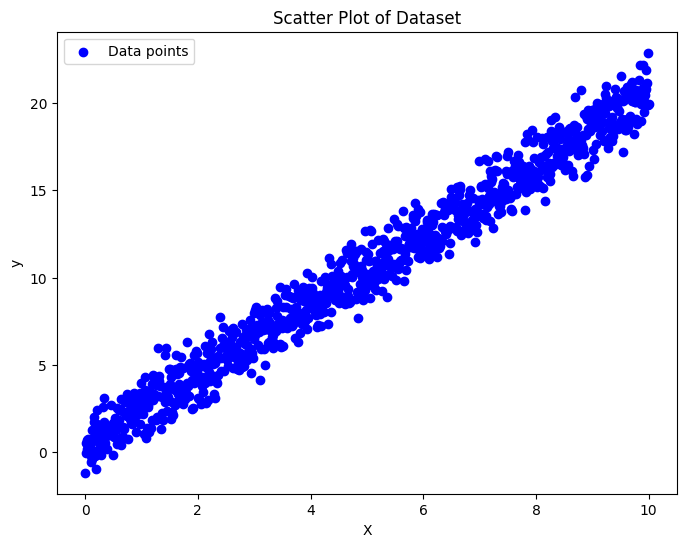

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Dataset')
plt.legend()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
def linear_regression(X, y, learning_rate=0.01, epochs=1000):
    # Initialize parameters w and b
    w = np.zeros((X.shape[1], 1))
    b = 0
    n = X.shape[0]
    
    # To store loss at each epoch
    losses = []
    
    # Gradient Descent
    for epoch in range(epochs):
        # Compute the predicted values
        y_pred = np.dot(X, w) + b
        
        # Compute the loss (Mean Squared Error)
        loss = (1/n) * np.sum((y_pred - y) ** 2)
        losses.append(loss)
        
        # Compute the gradients
        dw = (2/n) * np.dot(X.T, (y_pred - y))
        db = (2/n) * np.sum(y_pred - y)
        
        # Update parameters w and b
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss}")
    
    # Final values of w and b
    print("\nFinal values:")
    print(f"w: {w}")
    print(f"b: {b}")
    
    return w, b, losses

In [12]:
learning_rate = 0.01
epochs = 1000
w, b, losses = linear_regression(X_train, y_train, learning_rate, epochs)


Epoch 0/1000, Loss: 142.74872843526768
Epoch 100/1000, Loss: 0.9439485747563421
Epoch 200/1000, Loss: 0.9405619173841601
Epoch 300/1000, Loss: 0.9393009739722752
Epoch 400/1000, Loss: 0.9388314909058639
Epoch 500/1000, Loss: 0.9386566897628709
Epoch 600/1000, Loss: 0.9385916066069966
Epoch 700/1000, Loss: 0.938567374401726
Epoch 800/1000, Loss: 0.9385583521014949
Epoch 900/1000, Loss: 0.9385549928570286

Final values:
w: [[1.98263721]]
b: 0.5430297342361088


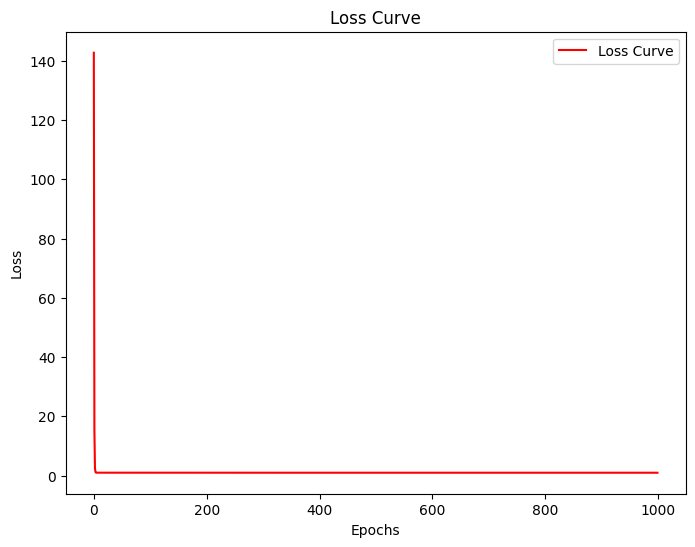

In [13]:
plt.figure(figsize=(8,6))
plt.plot(range(epochs), losses, color='red', label='Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()


NameError: name 'y_pred' is not defined

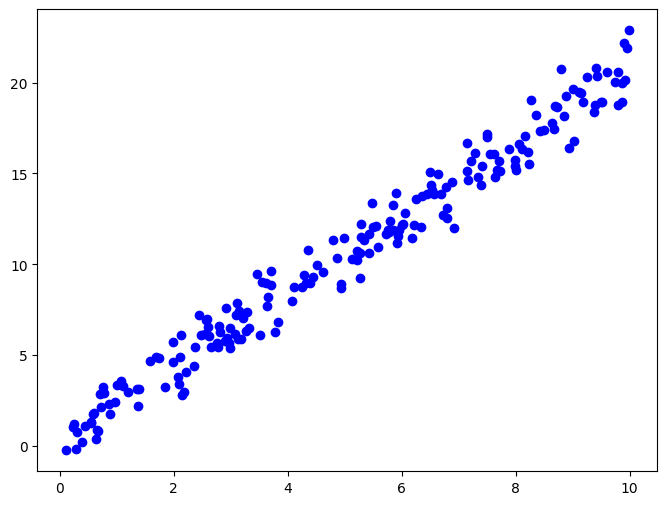

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()